In [27]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import os

# dataset overview

In [28]:
#root = 'D:/study/computational_ds/project/data/'
root = os.getcwd()


In [29]:
def parse(path):
  print(path)
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [30]:
# for filename in os.listdir(root):
#   df = getDF(root + filename)
#   plt.hist(df['overall'])
#   plt.title('histgram of '+filename[:-8])
#   plt.show()


In [31]:
df = getDF(root + '\Software_5.json.gz')

C:\Users\Frede\Documents\DTU\2023\CTDS\Project\computational-tools-for-DS\Software_5.json.gz


In [32]:
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4.0,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5.0,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN


In [33]:
df = df[['overall','reviewText']]

(array([1500.,    0.,  719.,    0.,    0., 1598.,    0., 3016.,    0.,
        5972.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

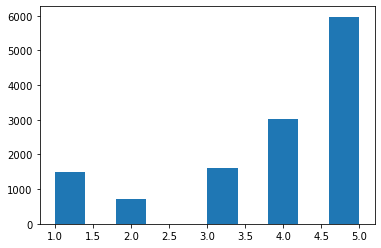

In [34]:
plt.hist(df['overall'])

## balance 5 levels

In [35]:
sample_size = df['overall'].value_counts().min()
groups = df.groupby('overall')
balance_idx = []
for key,subdf in groups:
    sample_idx = subdf.sample(n=sample_size).index
    balance_idx.extend(sample_idx)
balance_df = df.iloc[balance_idx]

In [36]:
balance_df.head(3)

,overall,reviewText
12272,1.0,Poorest operating system Microsoft ever made. ...
4552,1.0,"Currently using Quicken version 2006, using Wi..."
9417,1.0,The download for this product takes 3 to 4 hou...


# data pre-preocess

## remove na and duplicate rows

In [37]:
balance_df.isna().sum()

overall       0
reviewText    0
dtype: int64

In [38]:
balance_df.dropna(inplace=True)

C:\Users\Frede\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [39]:
balance_df.duplicated().sum()

246

In [40]:
balance_df.drop_duplicates(inplace=True)

In [41]:
#balance_df = balance_df[balance_df.reviewText.apply(lambda x: len(str(x)) > 3)]


(array([658.,   0., 641.,   0.,   0., 681.,   0., 699.,   0., 670.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

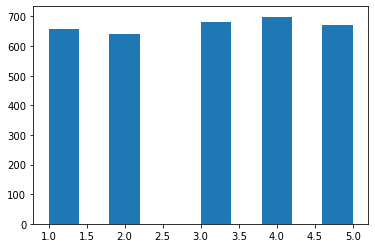

In [42]:
plt.hist(balance_df['overall'])

## clean with nltk package

In [43]:
import nltk
import string
from nltk import pos_tag # Part-of-Speech (POS) tagging
from nltk.stem import WordNetLemmatizer # lemmatize a word
from nltk.stem.porter import PorterStemmer # Information Retrieval
from nltk.tokenize import word_tokenize # splits sentence into words 
from nltk.tokenize import WhitespaceTokenizer # splits on and discards only whitespace characters
from nltk.corpus import wordnet # large lexical database of English words
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analyzer

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Frede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Frede\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Frede\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Frede\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Frede\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
# upload stopwords txt

gist_file = open(root+"/english", "r")
content = gist_file.read()
stopwords = content.split("\n")
gist_file.close()

In [45]:
content
     

"i\nme\nmy\nmyself\nwe\nour\nours\nourselves\nyou\nyou're\nyou've\nyou'll\nyou'd\nyour\nyours\nyourself\nyourselves\nhe\nhim\nhis\nhimself\nshe\nshe's\nher\nhers\nherself\nit\nit's\nits\nitself\nthey\nthem\ntheir\ntheirs\nthemselves\nwhat\nwhich\nwho\nwhom\nthis\nthat\nthat'll\nthese\nthose\nam\nis\nare\nwas\nwere\nbe\nbeen\nbeing\nhave\nhas\nhad\nhaving\ndo\ndoes\ndid\ndoing\na\nan\nthe\nand\nbut\nif\nor\nbecause\nas\nuntil\nwhile\nof\nat\nby\nfor\nwith\nabout\nagainst\nbetween\ninto\nthrough\nduring\nbefore\nafter\nabove\nbelow\nto\nfrom\nup\ndown\nin\nout\non\noff\nover\nunder\nagain\nfurther\nthen\nonce\nhere\nthere\nwhen\nwhere\nwhy\nhow\nall\nany\nboth\neach\nfew\nmore\nmost\nother\nsome\nsuch\nno\nnor\nnot\nonly\nown\nsame\nso\nthan\ntoo\nvery\ns\nt\ncan\nwill\njust\ndon\ndon't\nshould\nshould've\nnow\nd\nll\nm\no\nre\nve\ny\nain\naren\naren't\ncouldn\ncouldn't\ndidn\ndidn't\ndoesn\ndoesn't\nhadn\nhadn't\nhasn\nhasn't\nhaven\nhaven't\nisn\nisn't\nma\nmightn\nmightn't\nmustn\nmus

In [46]:
# return the wordnet object value
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # remove \t and \n
    text = text.replace('\t', ' ')
    text = text.replace('\n', ' ')
    # remove ','
    text = text.replace(',', ' ')
    text = text.replace('  ', ' ')
    text = text.replace("'", '')
    # lower text
    text = text.lower()
    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = [x for x in text if x not in stopwords]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = ' '.join(text)
    return(text)

In [61]:
balance_df['Clean_Review'] = balance_df['reviewText'].apply(lambda x: clean_text(x))
balance_df = balance_df.loc[balance_df.Clean_Review.apply(lambda x: len(x.split(" ")) > 1)]
balance_df.head()

,overall,reviewText,Clean_Review
12272,1.0,Poorest operating system Microsoft ever made. ...,poor operating system microsoft ever make long...
4552,1.0,"Currently using Quicken version 2006, using Wi...",currently use quicken version use window xp pr...
9417,1.0,The download for this product takes 3 to 4 hou...,download product take hour two time far result...
4377,1.0,This is the worst antivirus program I've ever ...,bad antivirus program ive ever try install com...
10150,1.0,Used turbotax for years.whatever happened to t...,use turbotax years.whatever happen dont know s...


In [62]:
balance_df.to_csv(root+'\clean_sample_data.csv',index=False)